In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## loading Data Set

In [2]:
df = pd.read_csv('books.csv')
df.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


## information about Data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

# Data cleaning and preprocessing steps :

## Checking Missing values 

In [4]:
df.isnull().sum()

book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64

## Handling Missing Values

In [5]:
df.dropna(inplace=True)

## Checking there is no missing values

In [6]:
df.isnull().sum()

book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

## Handling duplicate values

In [7]:
df.drop_duplicates(inplace=True)

# Analysis focused on the Harry Potter book series

In [8]:
# create a new dataframe for harrypotter_Series
harrypotter_Series = df[df['title'].str.contains('Harry Potter', case=False)]

In [9]:
# Identify the most selling books
most_selling_books = harrypotter_Series.sort_values(by='ratings_count', ascending=False)
most_selling_books['original_title']

1                Harry Potter and the Philosopher's Stone
6                Harry Potter and the Prisoner of Azkaban
9                 Harry Potter and the Chamber of Secrets
10                    Harry Potter and the Goblet of Fire
11                   Harry Potter and the Deathly Hallows
8               Harry Potter and the Order of the Phoenix
12                 Harry Potter and the Half-Blood Prince
96                        Complete Harry Potter Boxed Set
613          Harry Potter Collection (Harry Potter, #1-6)
1036    The Magical Worlds of Harry Potter: A Treasury...
Name: original_title, dtype: object

## plot the the most selling books

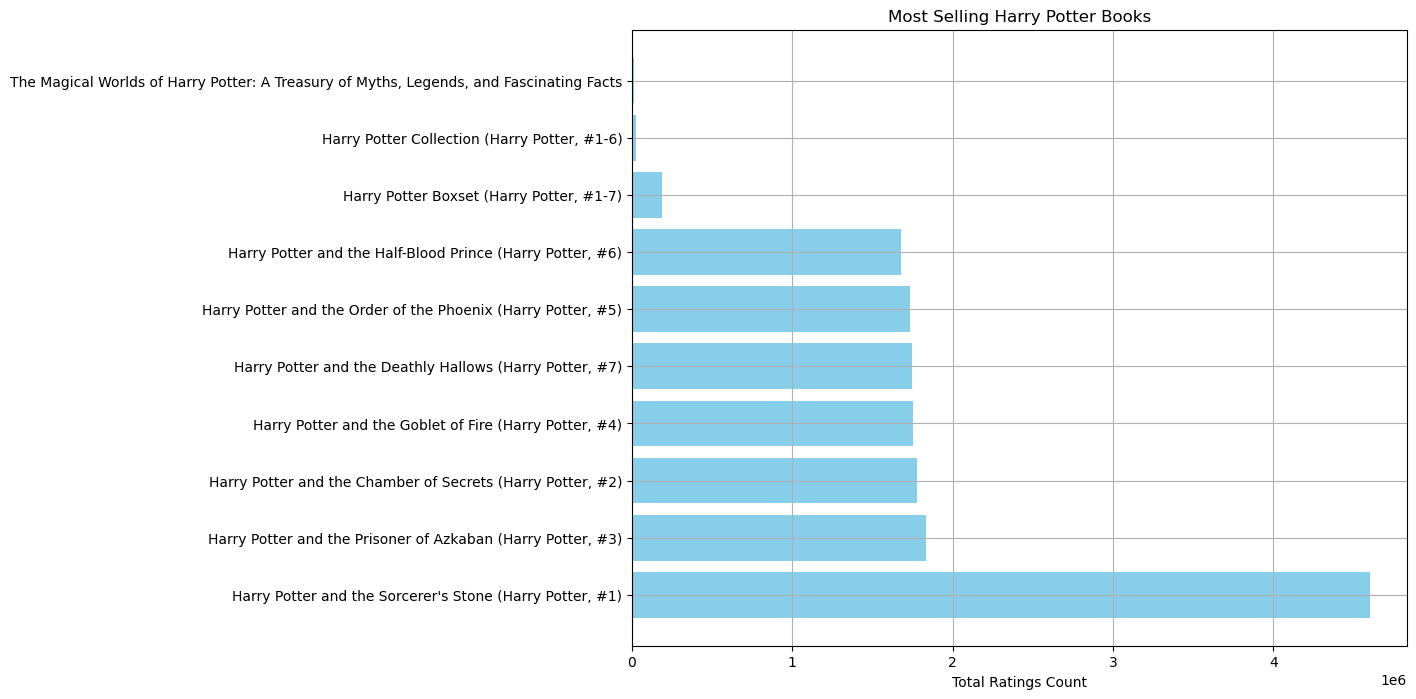

In [10]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(most_selling_books['title'], most_selling_books['ratings_count'], color='skyblue')
plt.xlabel('Total Ratings Count')
plt.title('Most Selling Harry Potter Books')
plt.grid()
plt.show()



## Calculate the average rating of the Harry Potter books.

In [11]:
average_rating_Harrypotter_Series = harrypotter_Series['average_rating'].mean()
print(f'Average rating of the Harry Potter books = {average_rating_Harrypotter_Series}')

Average rating of the Harry Potter books = 4.4910000000000005


## Identify The Most rating years of Harry Potter books

In [12]:
# Group by original publication year and calculate the total ratings count
rated_years = harrypotter_Series.groupby('original_publication_year')['ratings_count'].sum()

# Find the top 5 most rating years
most_rated_years =rated_years.nlargest(5)
most_rated_years


original_publication_year
1997.0    4602479
1998.0    1969381
1999.0    1832823
2000.0    1753043
2007.0    1746574
Name: ratings_count, dtype: int64

## plot the most rating years of Harry potter books using pie chart

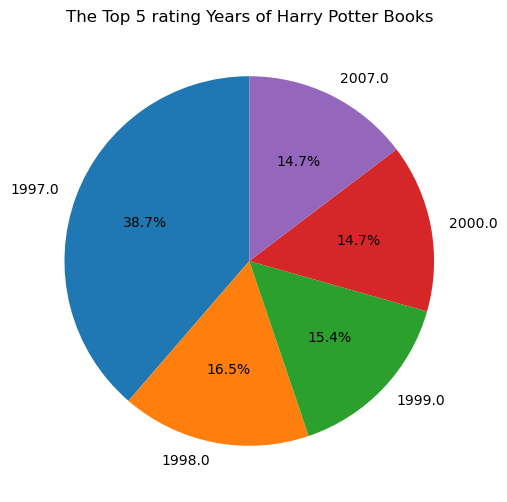

In [13]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(most_rated_years, labels=most_rated_years.index, startangle=90, autopct='%1.1f%%')
plt.title('The Top 5 rating Years of Harry Potter Books')
plt.show()

